**Detectando notícias falsas com Python**

---



Para construir um modelo para classificar com precisão uma notícia como REAL ou FALSIFICADA.

**Sobre a detecção de notícias falsas com Python**

---


Este projeto Python avançado de detecção de notícias falsas lida com notícias falsas e reais. Usando sklearn, construímos um TfidfVectorizer em nosso conjunto de dados. Em seguida, inicializamos um Classificador PassiveAggressive e ajustamos o modelo. No final, a pontuação de precisão e a matriz de confusão nos dizem o quão bem nosso modelo se sai.

**O conjunto de dados de notícias falsas**

---


O conjunto de dados que usaremos para este projeto Python - vamos chamá-lo de news.csv. Este conjunto de dados tem o formato de 7796 × 4. A primeira coluna identifica a notícia, a segunda e a terceira são o título e o texto, e a quarta coluna possui rótulos que indicam se a notícia é REAL ou FALSIFICADA. 

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Leitura dos dados
df=pd.read_csv('/content/drive/MyDrive/Projetos Data Science /Deteccao Fake News /news.csv')

#obter tamanho do conjunto de dados
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# - Obtenha os rótulos
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
# - Divida o conjunto de dados
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)
print("[INFO] Tamanho de cada conjunto de dados...")
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

[INFO] Tamanho de cada conjunto de dados...
(5068,) (1267,) (5068,) (1267,)


In [ ]:
# - Inicialize o TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# -Ajustar e transformar o conjunto de treinamento, transformar o conjunto de teste
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
# - Inicialize um PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# - Preveja no conjunto de teste e calcula a precisão
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


In [ ]:
# - Construir matriz de confusão
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cm)

[[588  50]
 [ 41 588]]


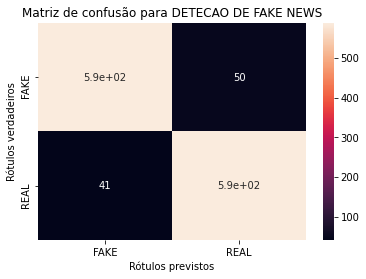

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot = True para anotar células

# rótulos, título e subrótulos
ax.set_xlabel('Rótulos previstos');ax.set_ylabel('Rótulos verdadeiros'); 
ax.set_title('Matriz de confusão para DETECAO DE FAKE NEWS'); 
ax.xaxis.set_ticklabels(['FAKE', 'REAL']); ax.yaxis.set_ticklabels(['FAKE', 'REAL']);
plt.show()